In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
calendar = pd.read_csv("calendar.csv")
sales = pd.read_csv("sales_train_validation.csv")
sell_price = pd.read_csv("sell_prices.csv")

In [3]:
for_use = sales.iloc[:,:-28]
valid = pd.concat([sales.iloc[:,:6], sales.iloc[:,-28:]], axis = 1)

In [4]:
# Group by category & state
for_use[(for_use['cat_id']=='HOBBIES')&(for_use['state_id']=='CA')].shape
sales_g1 = for_use[(for_use['cat_id']=='HOBBIES')&(for_use['state_id']=='CA')]

In [5]:
# Transform the data
sales_g1_melt = pd.melt(sales_g1, id_vars=sales_g1.columns[:6], value_vars=sales_g1.columns[6:])
sales_g1_melt.columns = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'sales']

In [6]:
# Merge all dataset
sales_g1_melt_merge = pd.merge(sales_g1_melt, calendar)
sales_g1_melt_merge = pd.merge(sales_g1_melt_merge, sell_price, how = 'left')
sales_g1_melt_merge = sales_g1_melt_merge.sort_values(['id', 'date']).reset_index(drop = True)

In [7]:
sales_g1_melt_merge

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_338,0,1/1/2012,11149,...,1,2012,NewYear,National,NaN,NaN,1,1,0,NaN
1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_704,0,1/1/2013,11249,...,1,2013,NewYear,National,NaN,NaN,1,1,0,NaN
2,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1069,1,1/1/2014,11349,...,1,2014,NewYear,National,NaN,NaN,1,1,0,8.26
3,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1434,0,1/1/2015,11448,...,1,2015,NewYear,National,NaN,NaN,1,1,0,8.26
4,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1799,0,1/1/2016,11548,...,1,2016,NewYear,National,NaN,NaN,1,1,0,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260095,HOBBIES_2_149_CA_4_validation,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA_4,CA,d_224,0,9/9/2011,11132,...,9,2011,NaN,NaN,NaN,NaN,1,1,1,NaN
4260096,HOBBIES_2_149_CA_4_validation,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA_4,CA,d_590,0,9/9/2012,11233,...,9,2012,NaN,NaN,NaN,NaN,1,1,1,NaN
4260097,HOBBIES_2_149_CA_4_validation,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA_4,CA,d_955,0,9/9/2013,11333,...,9,2013,NaN,NaN,NaN,NaN,1,1,1,2.47
4260098,HOBBIES_2_149_CA_4_validation,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA_4,CA,d_1320,0,9/9/2014,11432,...,9,2014,NaN,NaN,NaN,NaN,1,1,1,0.97


In [16]:
# Drop some useless columns
df = sales_g1_melt_merge[['item_id', 'dept_id', 'store_id', 'd', 'sales', 'wm_yr_wk', 'wday', 'month', 'year',
                          'event_name_1', 'event_name_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price']].copy()

In [17]:
df

,item_id,dept_id,store_id,d,sales,wm_yr_wk,wday,month,year,event_name_1,event_name_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001,HOBBIES_1,CA_1,d_338,0,11149,2,1,2012,NewYear,NaN,1,1,0,NaN
1,HOBBIES_1_001,HOBBIES_1,CA_1,d_704,0,11249,4,1,2013,NewYear,NaN,1,1,0,NaN
2,HOBBIES_1_001,HOBBIES_1,CA_1,d_1069,1,11349,5,1,2014,NewYear,NaN,1,1,0,8.26
3,HOBBIES_1_001,HOBBIES_1,CA_1,d_1434,0,11448,6,1,2015,NewYear,NaN,1,1,0,8.26
4,HOBBIES_1_001,HOBBIES_1,CA_1,d_1799,0,11548,7,1,2016,NewYear,NaN,1,1,0,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260095,HOBBIES_2_149,HOBBIES_2,CA_4,d_224,0,11132,7,9,2011,NaN,NaN,1,1,1,NaN
4260096,HOBBIES_2_149,HOBBIES_2,CA_4,d_590,0,11233,2,9,2012,NaN,NaN,1,1,1,NaN
4260097,HOBBIES_2_149,HOBBIES_2,CA_4,d_955,0,11333,3,9,2013,NaN,NaN,1,1,1,2.47
4260098,HOBBIES_2_149,HOBBIES_2,CA_4,d_1320,0,11432,4,9,2014,NaN,NaN,1,1,1,0.97


In [18]:
# df['event_name_1'] = (df['event_name_1'].notnull()).astype('int')
# df['event_name_2'] = (df['event_name_2'].notnull()).astype('int')
df['wm_yr_wk'] = df['wm_yr_wk'].apply(lambda x: int(str(x)[-2:]))

### Encoding Events

In [19]:
df['event_name_1_Name'] = df['event_name_1']
df['event_name_2_Name'] = df['event_name_2']

In [20]:
# Missing value: NaN = 0
# astype('str') since LabelEncoder needs consistent datatype
df["event_name_1"] = df["event_name_1"].fillna(0).astype('str')
df["event_name_2"] = df["event_name_2"].fillna(0).astype('str')

In [21]:
# Encode the events
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["event_name_1"] = labelencoder.fit_transform(df["event_name_1"])
df["event_name_2"] = labelencoder.fit_transform(df["event_name_2"])

### Accumulated (2011-2016 in total) Sales based on Event 1-30

In [24]:
df_with_event1 = df.loc[df['event_name_1'] != 0]
df_without_event1 = df.loc[df['event_name_1'] == 0]
df_with_event1

,item_id,dept_id,store_id,d,sales,wm_yr_wk,wday,month,year,event_name_1,event_name_2,snap_CA,snap_TX,snap_WI,sell_price,event_name_1_Name,event_name_2_Name
0,HOBBIES_1_001,HOBBIES_1,CA_1,d_338,0,49,2,1,2012,19,0,1,1,0,NaN,NewYear,NaN
1,HOBBIES_1_001,HOBBIES_1,CA_1,d_704,0,49,4,1,2013,19,0,1,1,0,NaN,NewYear,NaN
2,HOBBIES_1_001,HOBBIES_1,CA_1,d_1069,1,49,5,1,2014,19,0,1,1,0,8.26,NewYear,NaN
3,HOBBIES_1_001,HOBBIES_1,CA_1,d_1434,0,48,6,1,2015,19,0,1,1,0,8.26,NewYear,NaN
4,HOBBIES_1_001,HOBBIES_1,CA_1,d_1799,0,48,7,1,2016,19,0,1,1,0,8.26,NewYear,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260007,HOBBIES_2_149,HOBBIES_2,CA_4,d_948,0,32,3,9,2013,11,0,1,0,1,2.47,LaborDay,NaN
4260034,HOBBIES_2_149,HOBBIES_2,CA_4,d_1700,0,34,6,9,2015,7,0,0,0,0,0.97,EidAlAdha,NaN
4260061,HOBBIES_2_149,HOBBIES_2,CA_4,d_584,0,32,3,9,2012,11,0,1,1,1,NaN,LaborDay,NaN
4260075,HOBBIES_2_149,HOBBIES_2,CA_4,d_220,0,32,3,9,2011,11,0,1,1,1,NaN,LaborDay,NaN


    event_name_1    event_name_1_Name  sales
0              1         Chanukah End   7858
1              2            Christmas      0
2              3        Cinco De Mayo   6008
3              4          ColumbusDay   7438
4              5               Easter   7659
5              6          Eid al-Fitr   7467
6              7            EidAlAdha   7681
7              8         Father's day   6861
8              9            Halloween   7749
9             10      IndependenceDay   6482
10            11             LaborDay   7348
11            12            LentStart   8852
12            13            LentWeek2   9093
13            14  MartinLutherKingDay   7977
14            15          MemorialDay   7598
15            16         Mother's day   7564
16            17         NBAFinalsEnd   7560
17            18       NBAFinalsStart   7418
18            19              NewYear   5703
19            20    OrthodoxChristmas   7414
20            21       OrthodoxEaster   6860
21        

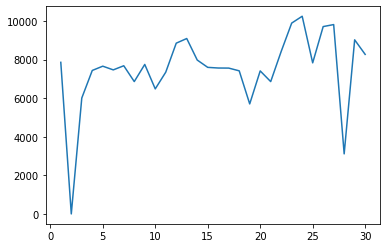

In [70]:
with_event1_Name = pd.DataFrame(df_with_event1['sales'].groupby(df_with_event1['event_name_1_Name']).sum()).reset_index()
with_event1_number = pd.DataFrame(df_with_event1['sales'].groupby(df_with_event1['event_name_1']).sum()).reset_index()
event_1 = pd.merge(with_event1_number, with_event1_Name)
event_1 = event_1[['event_name_1', 'event_name_1_Name', 'sales']]
# without_event1 = df_without_event1['sales'].groupby(df_without_event1['year']).sum()
print(event_1)
plt.plot(with_event1_for_plot)

### Sales of Event 1-30 based in different year

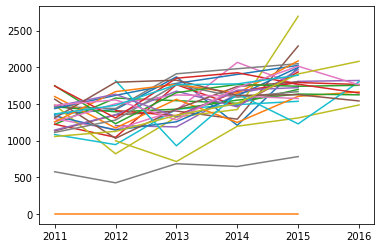

In [65]:
each_event_yearly = df_with_event1.groupby(['event_name_1', 'year']).sum()
for i in range(1, 31):
    x = each_event_yearly['sales'].loc[i]
    plt.plot(x)

In [75]:
each_event_yearly_2 = df_with_event1.groupby(['event_name_1', 'year']).sum().reset_index()
each_event_yearly_2

x = each_event_yearly_2.groupby('event_name_1')
print(x)

In [ ]:
each_event_yearly_2

In [ ]:
train = df.loc[df['d'].isin(list(df['d'].unique()[:-28]))]
test = df.loc[df['d'].isin(list(df['d'].unique()[-28:]))]
#test['sell_price'].isna().sum()

In [ ]:
train = train[train['sell_price'].notna()]
X_train = train[['wm_yr_wk', 'wday', 'month', 'year', 'event_name_1', 'event_name_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price']]
y_train = train['sales']
X_test = test[['wm_yr_wk', 'wday', 'month', 'year', 'event_name_1', 'event_name_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price']]
y_test = test['sales']